In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\Aakas\Downloads\Compressed\home-data-for-ml-course\train.csv')
test=pd.read_csv(r'C:\Users\Aakas\Downloads\Compressed\home-data-for-ml-course\test.csv')

In [3]:
Id=test['Id']

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# train=train.drop(train[train['SalePrice']==755000])
# train=train.drop(train[train['SalePrice']==745000])
# train=train[(train['SalePrice']!=755000)]
# train=train[(train['SalePrice']!=745000)]

In [6]:
train.shape

(1460, 81)

In [7]:
pd.set_option('display.max_rows',None)

In [8]:
del train['Id']
del test['Id']



In [9]:
ttrain=train.copy()
ttest=test.copy()

In [10]:
y=train['SalePrice']
del ttrain['SalePrice']

Since the Id column is unnecessary we remove it

In [11]:
train_test=pd.concat([ttrain,ttest],sort=False)
train_test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
ttest.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### Exploring effects of Missing value

In [13]:
missing=[col for col in train.columns if train[col].isnull().any()]
for feature in missing:
    print('{:<15}:{:.2f} %'.format(feature,train[feature].isnull().mean()))

LotFrontage    :0.18 %
Alley          :0.94 %
MasVnrType     :0.01 %
MasVnrArea     :0.01 %
BsmtQual       :0.03 %
BsmtCond       :0.03 %
BsmtExposure   :0.03 %
BsmtFinType1   :0.03 %
BsmtFinType2   :0.03 %
Electrical     :0.00 %
FireplaceQu    :0.47 %
GarageType     :0.06 %
GarageYrBlt    :0.06 %
GarageFinish   :0.06 %
GarageQual     :0.06 %
GarageCond     :0.06 %
PoolQC         :1.00 %
Fence          :0.81 %
MiscFeature    :0.96 %


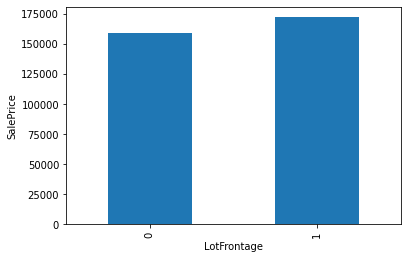

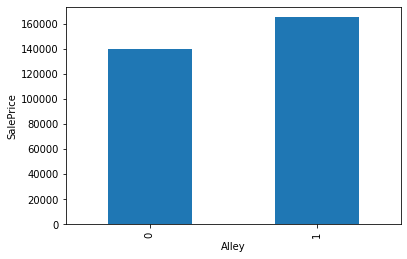

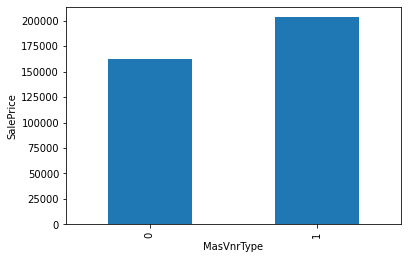

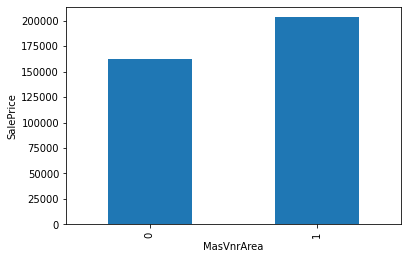

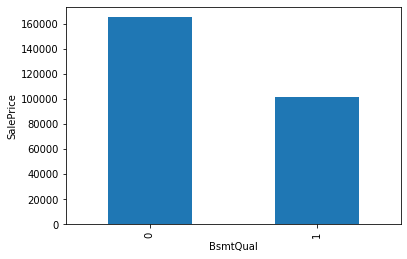

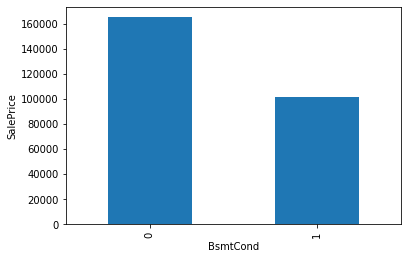

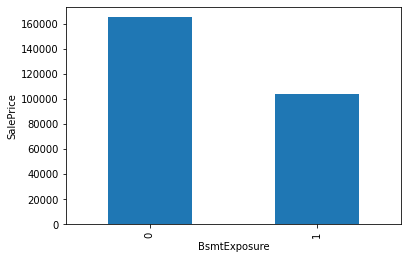

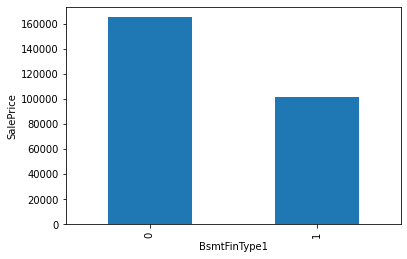

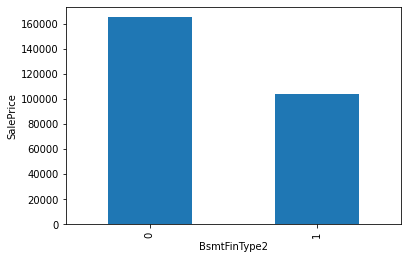

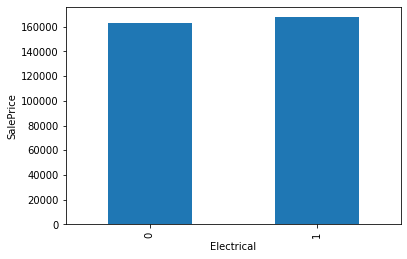

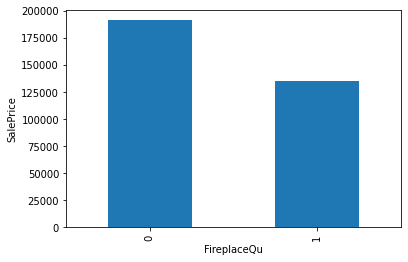

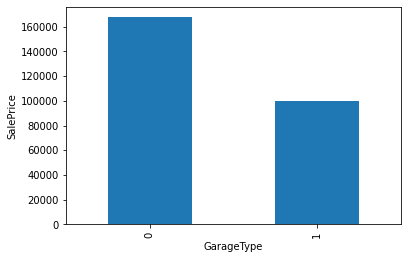

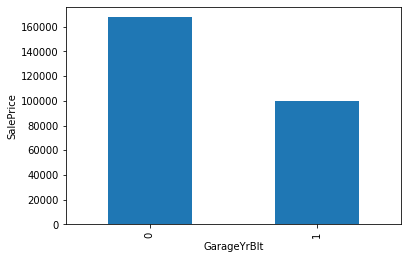

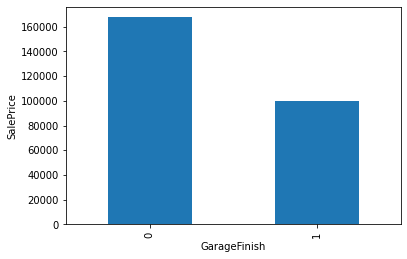

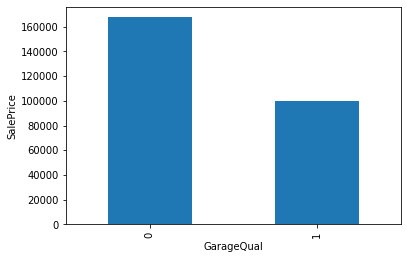

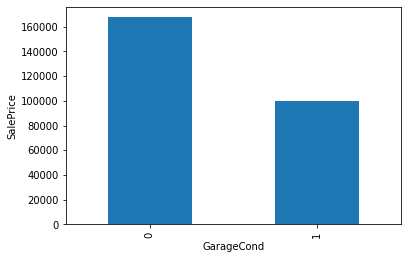

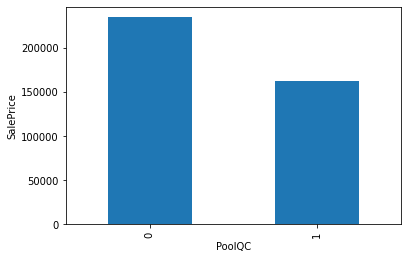

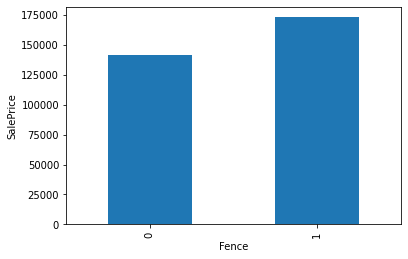

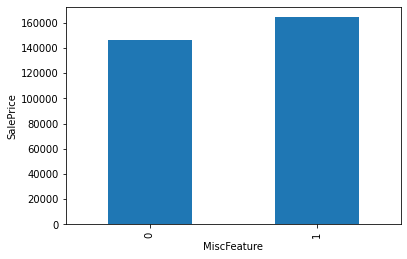

In [14]:
for feature in missing:
    df=train.copy()
    df[feature]=np.where(df[feature].isnull(),1,0)
    plt.figure()
    df.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    

Here the missing value have some relation with sale price so we cannot ignore its effects so we replace with some value

### Numerical Values

In [15]:
num_cols=[col for col in train.columns if train[col].dtype  in ['int64','float64']]
train[num_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#### Selecting the Year variables 

In [16]:
year_cols=[col for col in num_cols if ('Yr' in col) or ('Year' in col) ]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

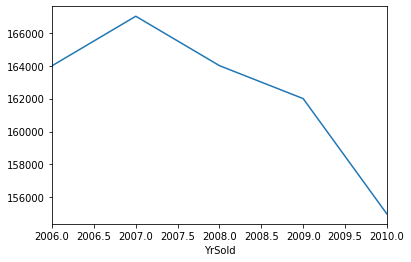

In [17]:
train.groupby('YrSold')['SalePrice'].median().plot()

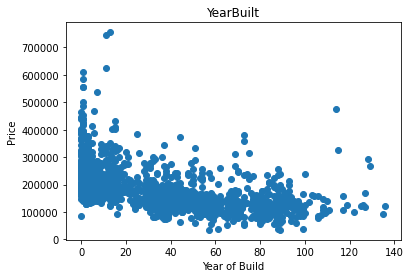

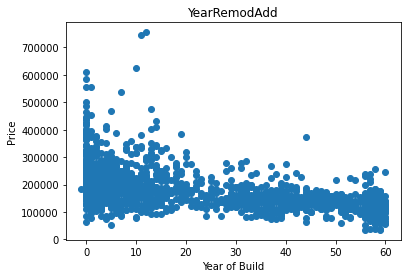

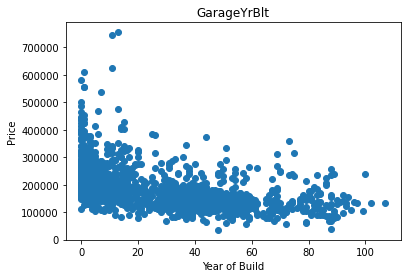

In [18]:
for feature in year_cols:
    if feature !='YrSold':
        data=train.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.figure()
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel('Year of Build')
        plt.title(feature)
        plt.ylabel('Price')

Year of build decreases the sale price of house as time goes on(or Newer builds cost more)

##### Analyzing the discrete and continuous numerical features 

In [19]:
#Discrete Features
discrete_num_cols=[col for col in num_cols if (train[col].nunique()<25) and col not in year_cols]
train[discrete_num_cols].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


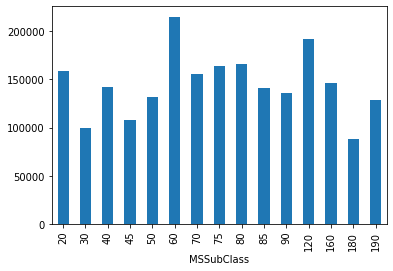

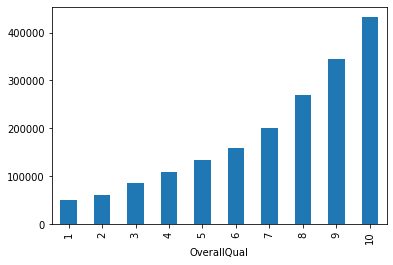

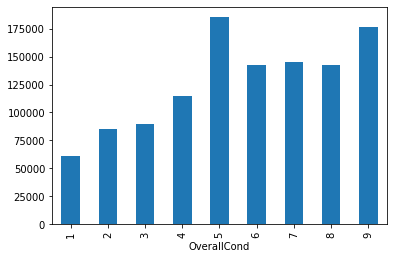

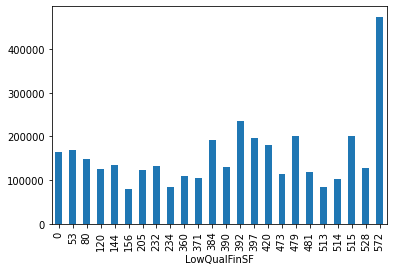

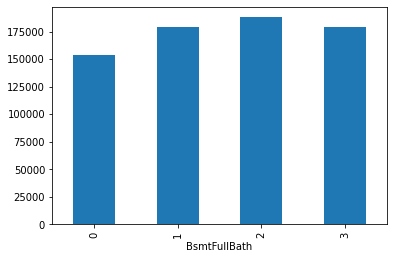

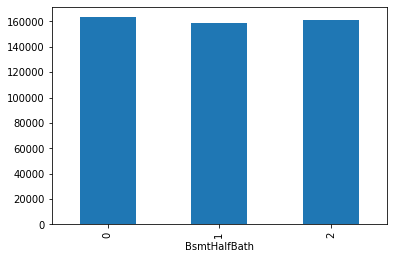

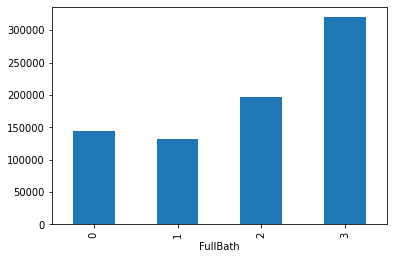

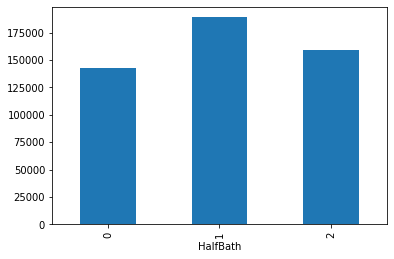

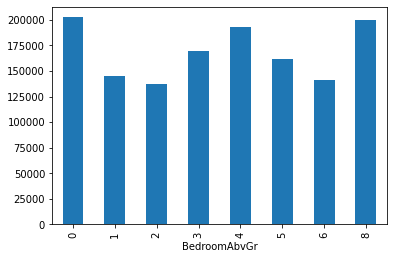

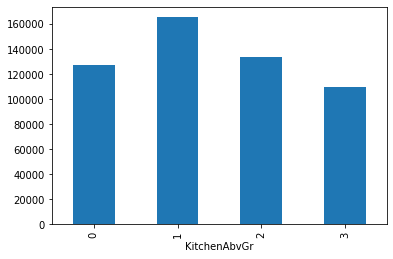

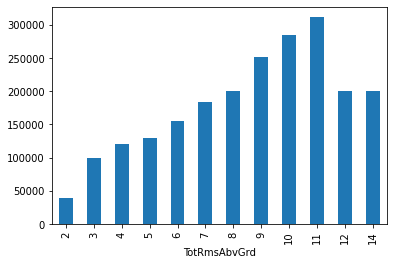

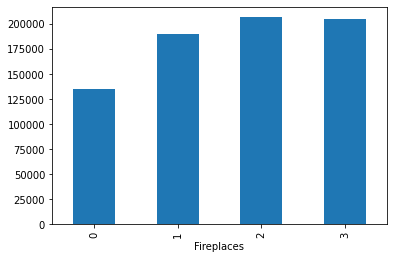

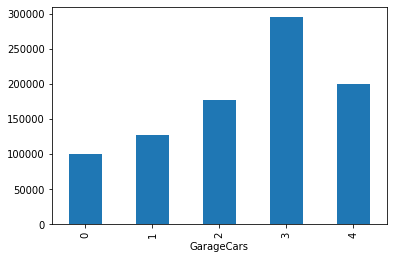

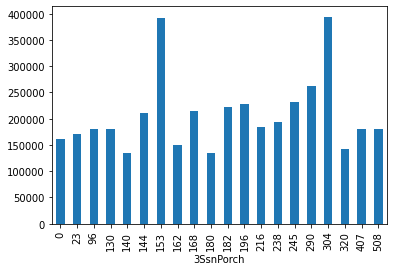

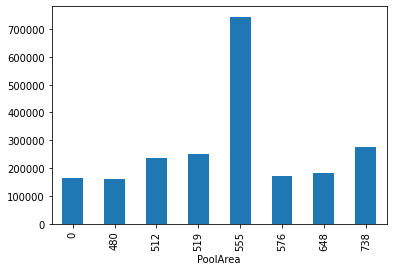

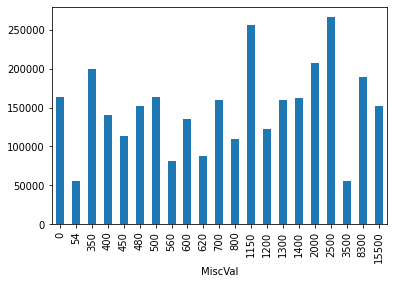

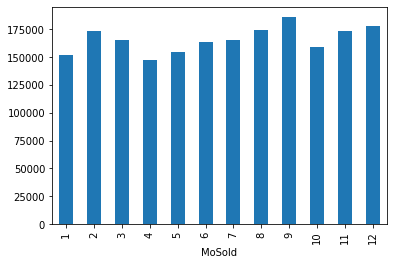

In [20]:
for feature in discrete_num_cols:
    plt.figure()
    train.groupby(feature)['SalePrice'].median().plot(kind='bar')
    

Seems there is relationship between discrete variables and sale price

In [21]:
#Continuous variable
continuous_num_cols=[col for col in num_cols if (col not in discrete_num_cols) and (col not in year_cols)]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaco

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control thi

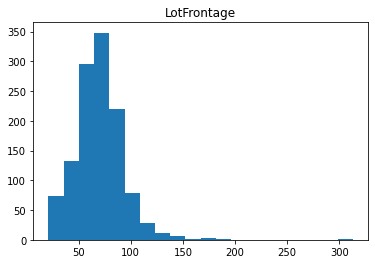

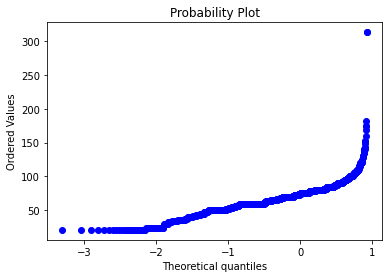

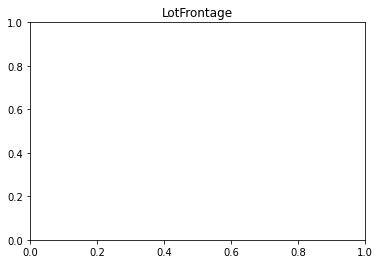

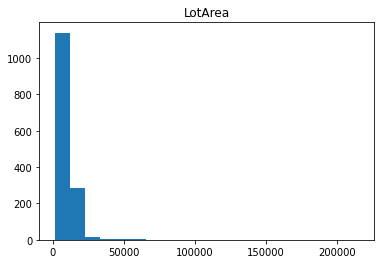

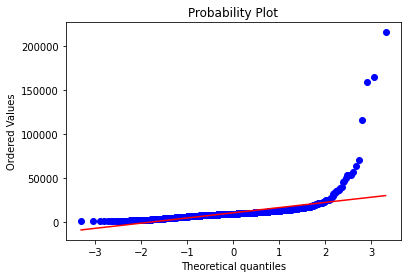

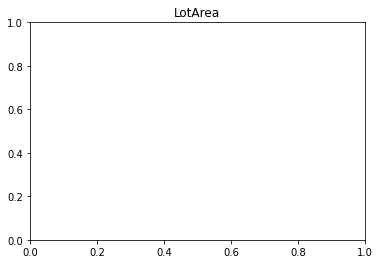

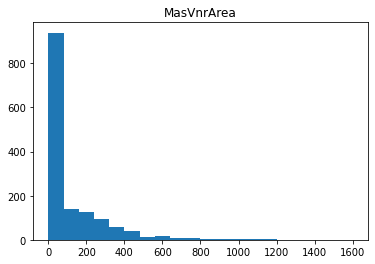

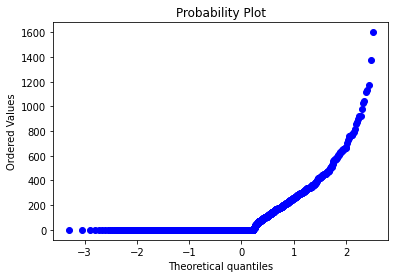

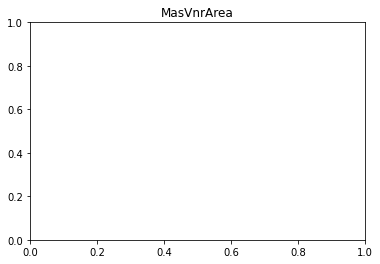

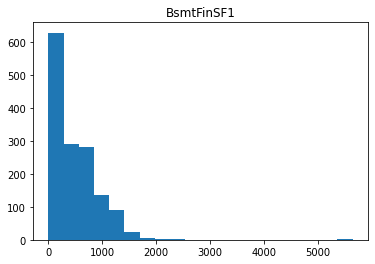

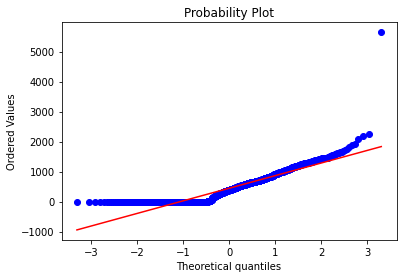

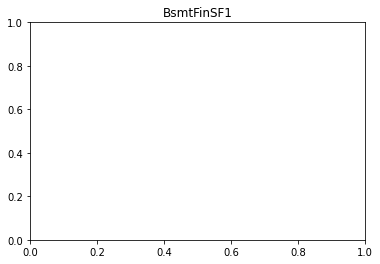

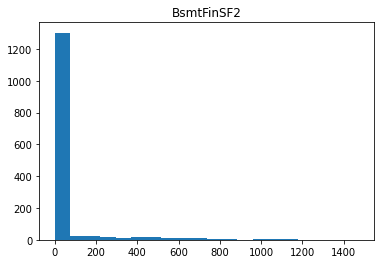

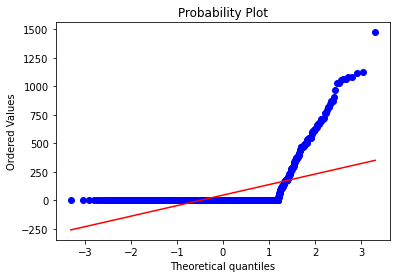

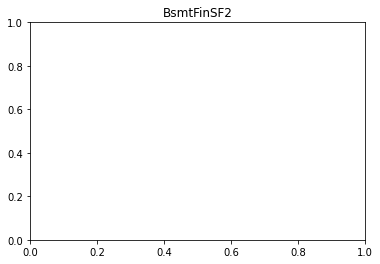

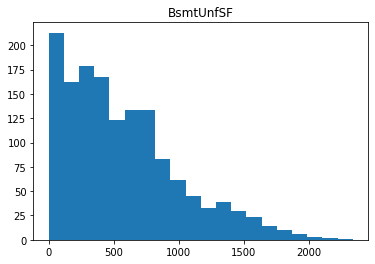

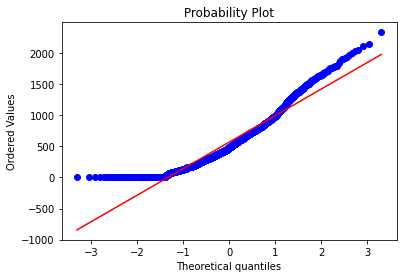

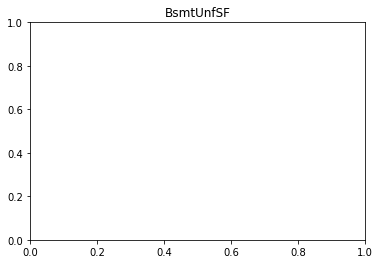

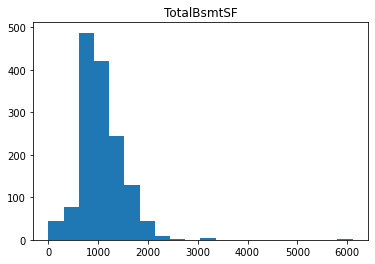

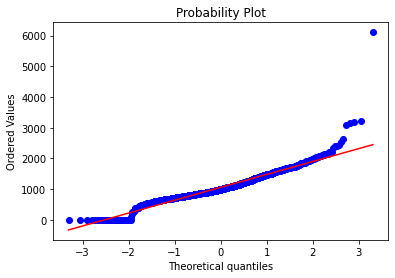

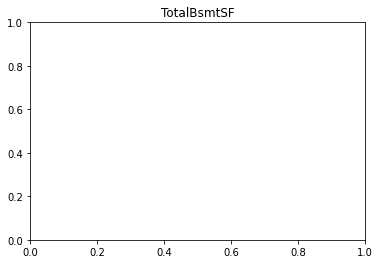

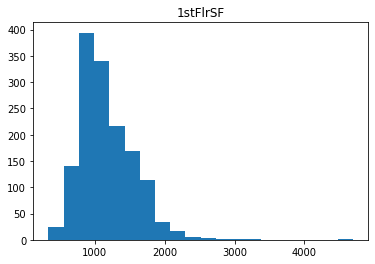

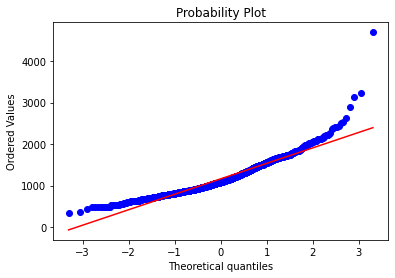

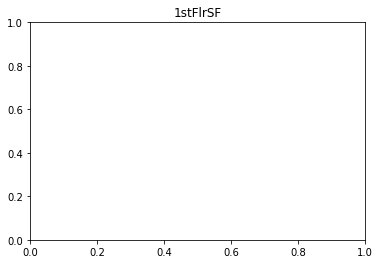

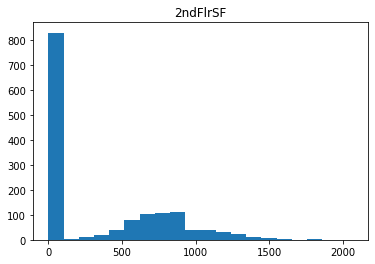

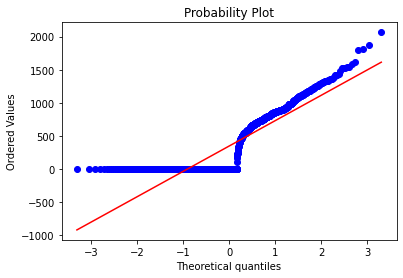

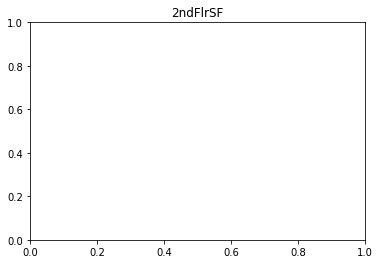

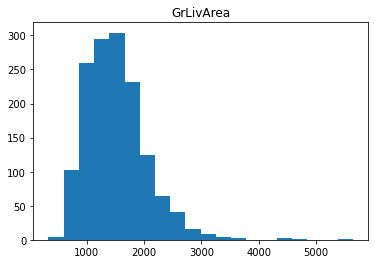

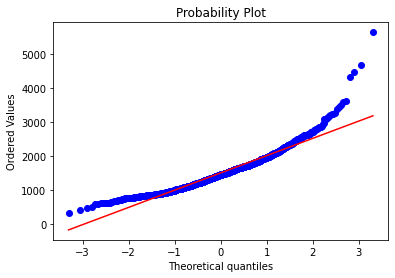

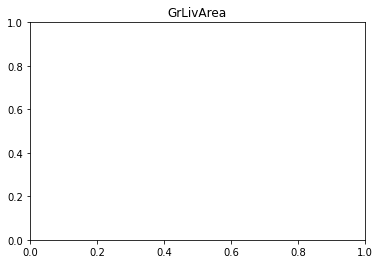

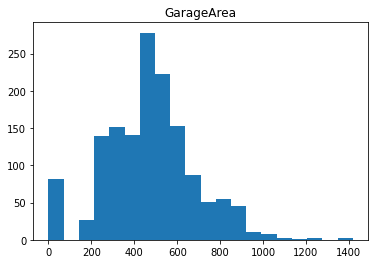

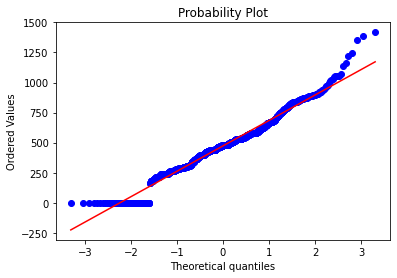

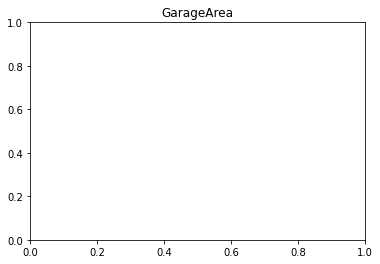

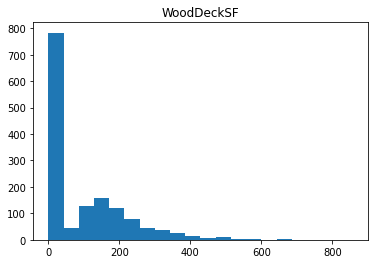

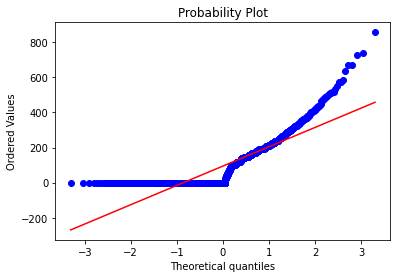

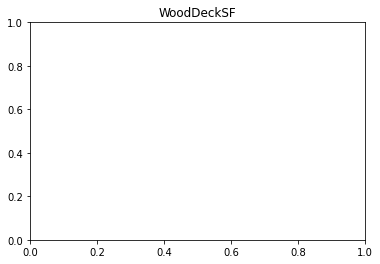

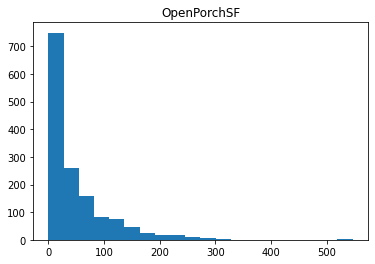

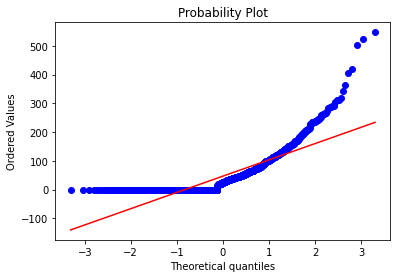

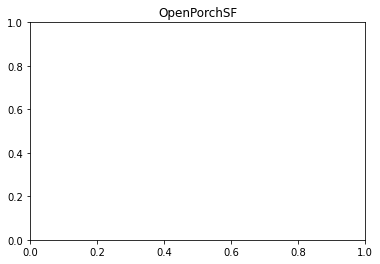

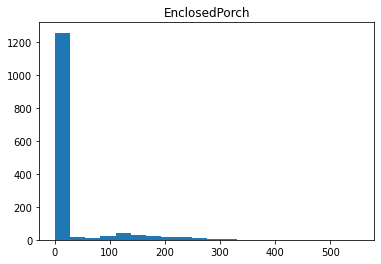

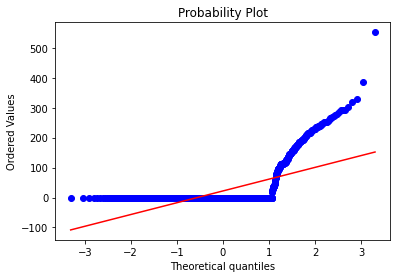

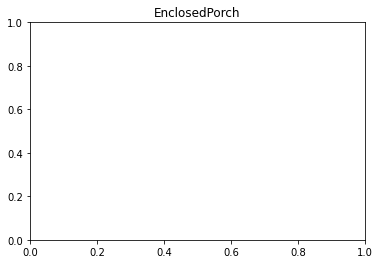

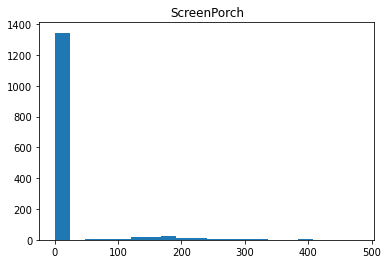

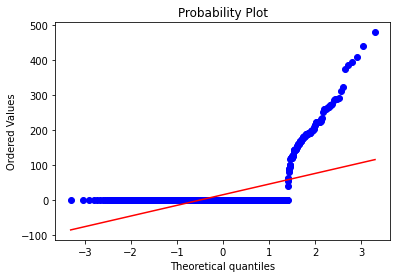

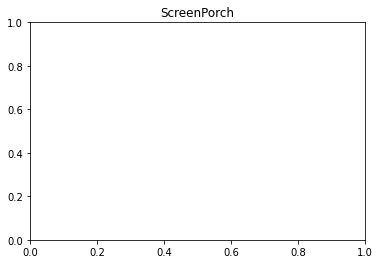

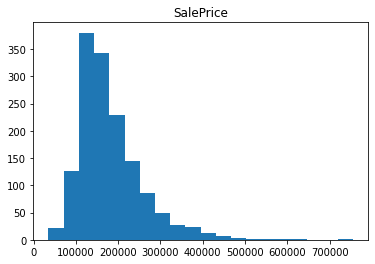

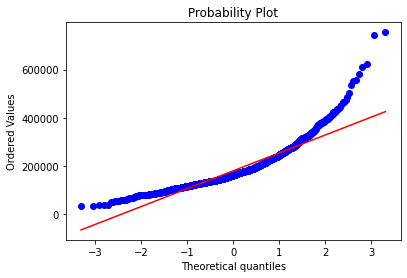

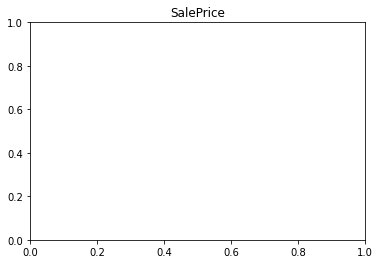

In [22]:
from scipy import stats
for feature in continuous_num_cols:
    data=train.copy()
    plt.figure()
    plt.title(feature)
#     sns.distplot(data[feature].dropna(),fit=stats.norm)
    plt.hist(data[feature],bins=20)
    plt.figure()
    stats.probplot(data[feature],plot=plt)
    plt.figure()
#     plt.hist(data[feature],bins=20)

    plt.title(feature)

Most of the continuous variables are skewed so we might log transform to make it normal

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


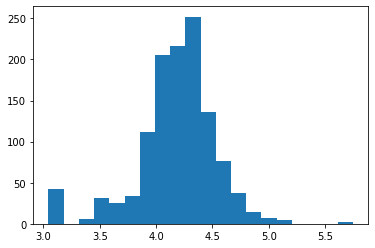

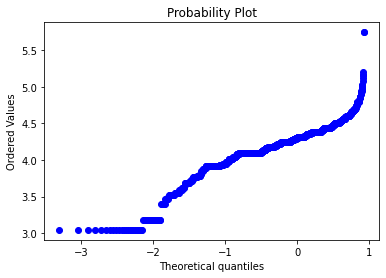

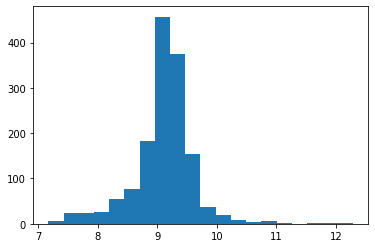

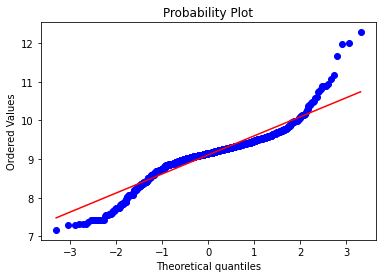

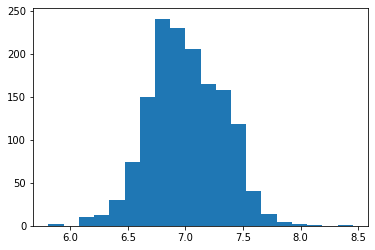

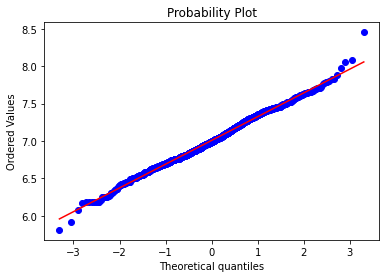

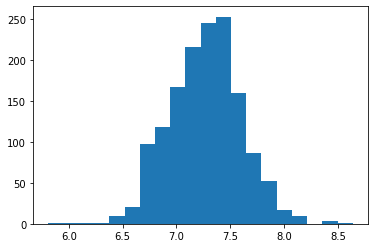

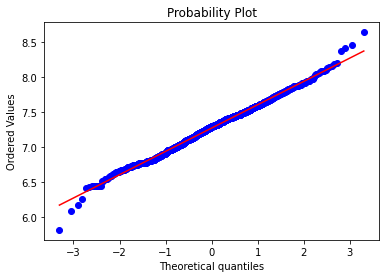

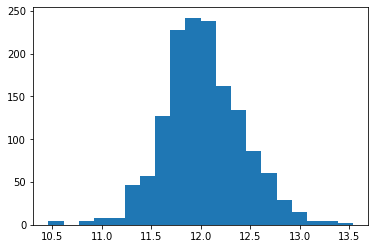

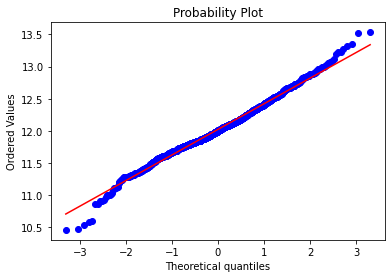

In [23]:
for feature in continuous_num_cols:
    data=train.copy()
    if 0 in data[feature].unique():
#         data[feature]=np.log(data[feature]+1)
        continue
        
    else:
        data[feature]=np.log(data[feature])
    plt.figure()
    plt.hist(data[feature],bins=20)
    plt.figure()
    stats.probplot(data[feature],plot=plt)
   
    

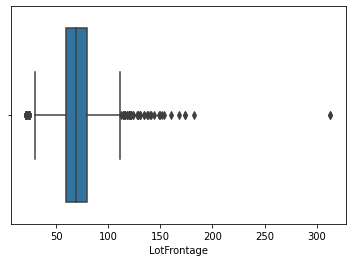

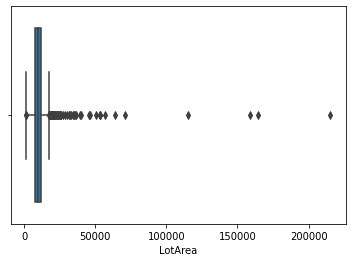

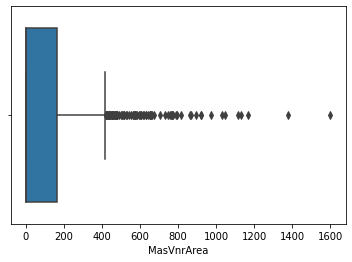

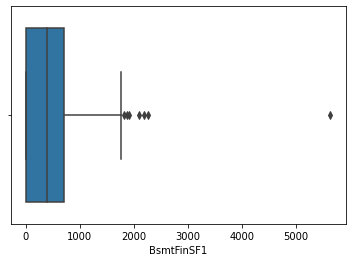

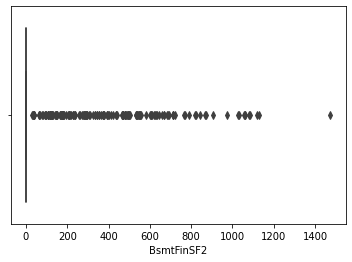

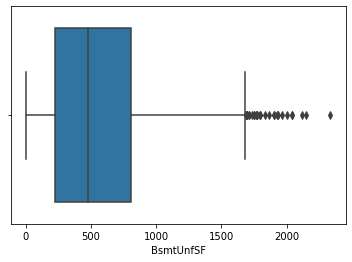

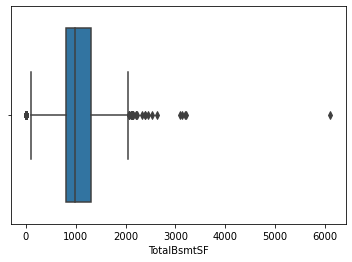

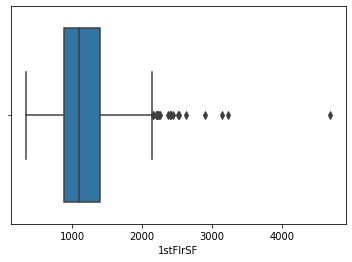

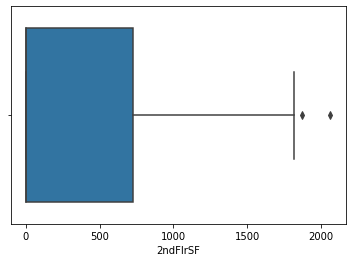

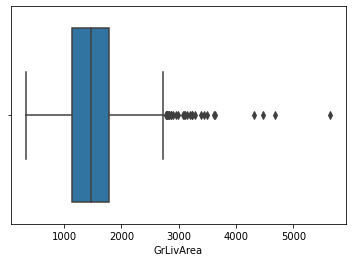

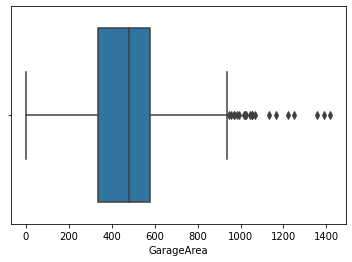

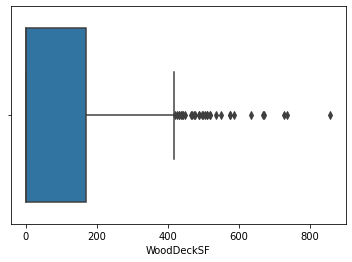

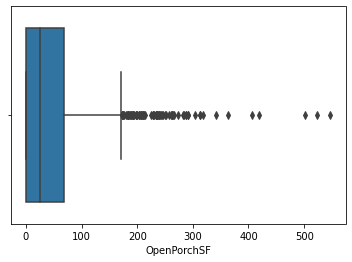

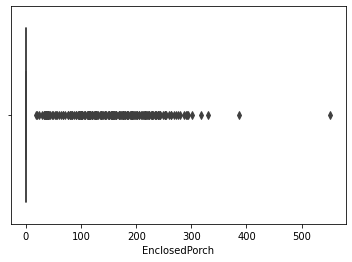

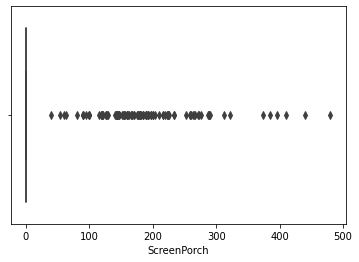

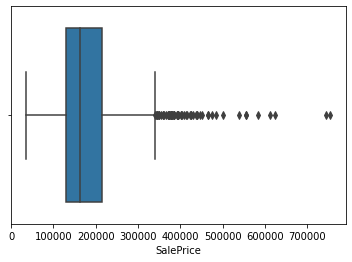

In [24]:
for feature in continuous_num_cols:
    plt.figure()
    sns.boxplot(train[feature])

There are many outliers in the continuous variables

### Categorical Variable

In [25]:
cat_cols=[col for col in train.columns if train[col].dtype=='object']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

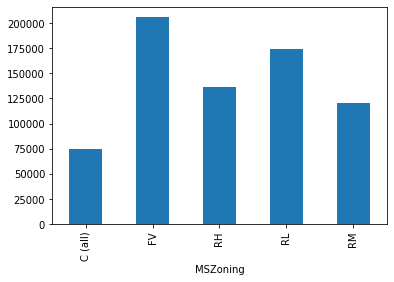

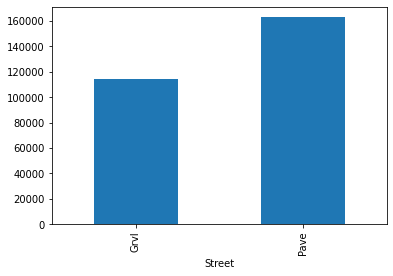

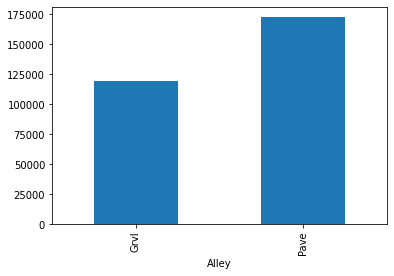

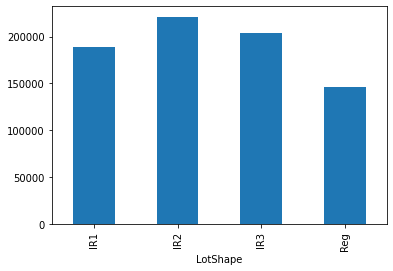

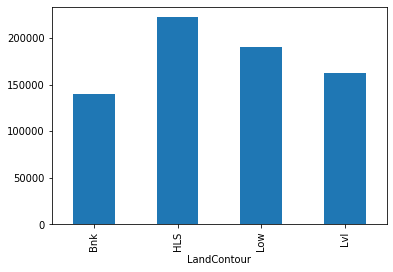

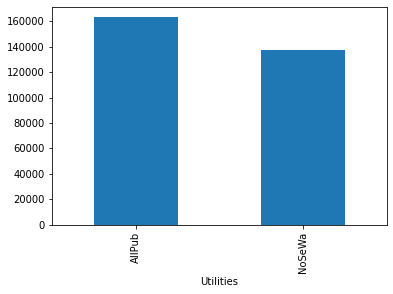

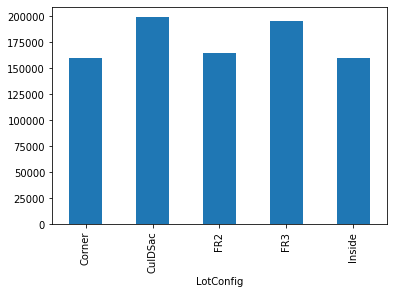

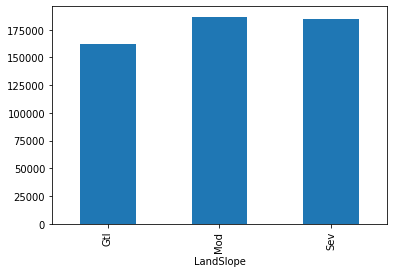

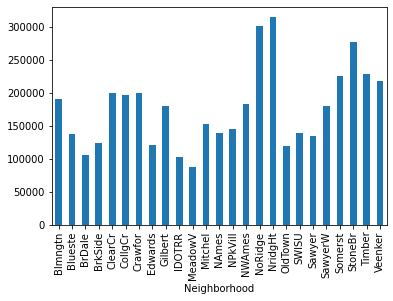

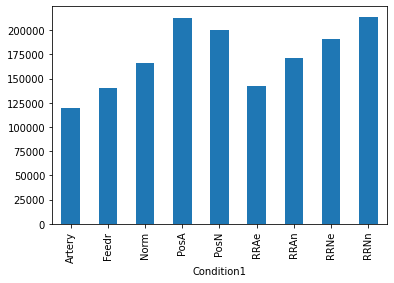

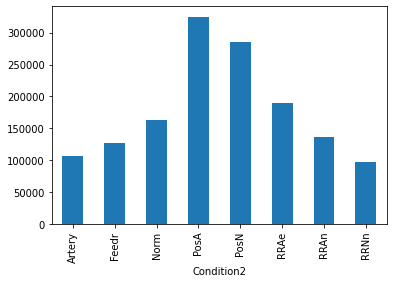

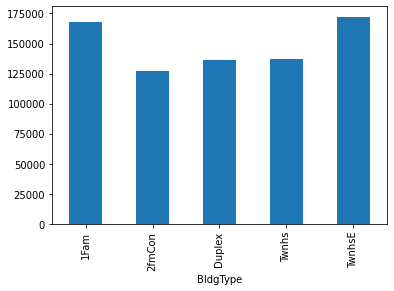

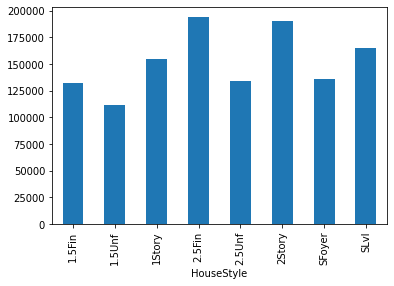

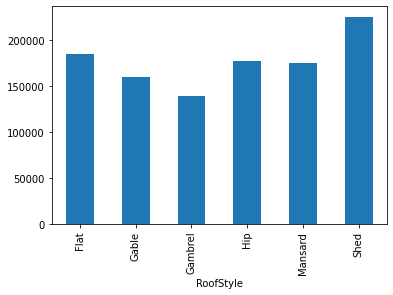

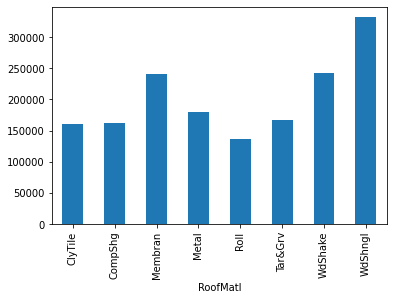

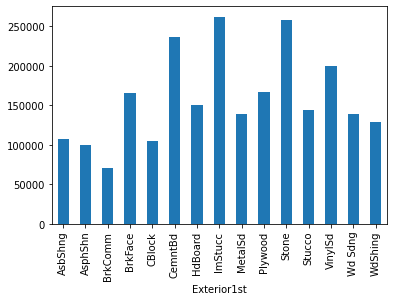

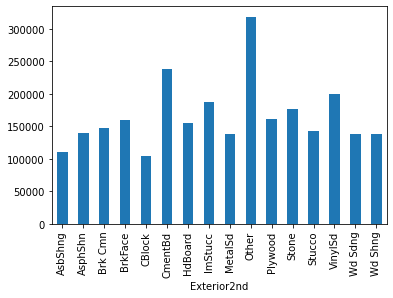

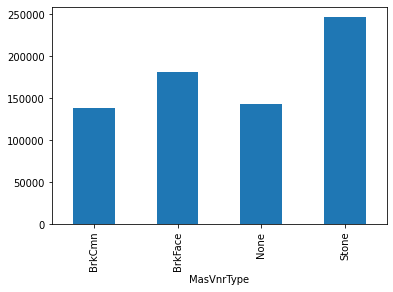

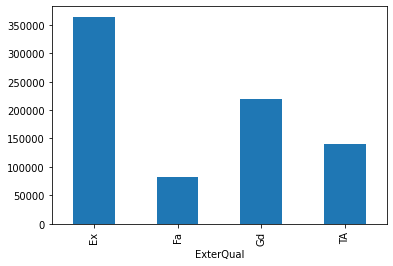

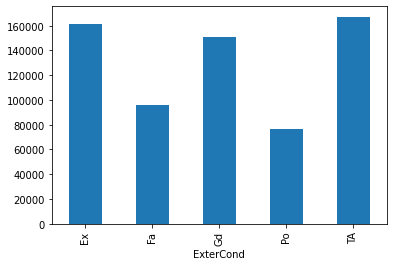

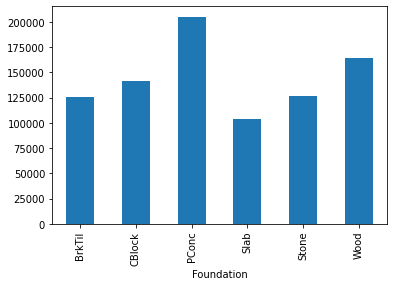

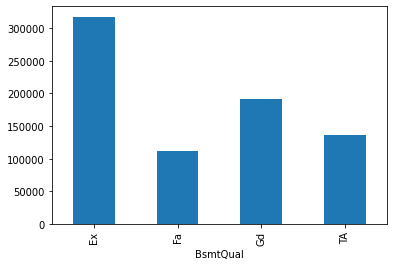

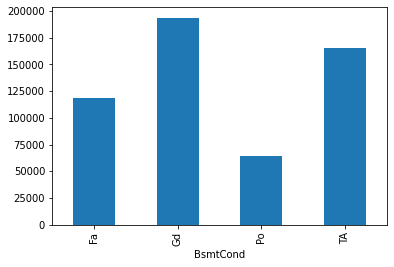

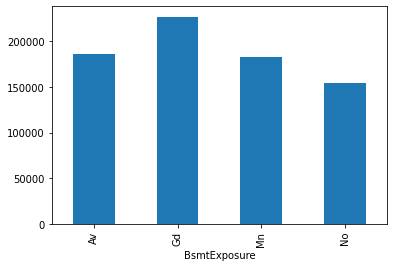

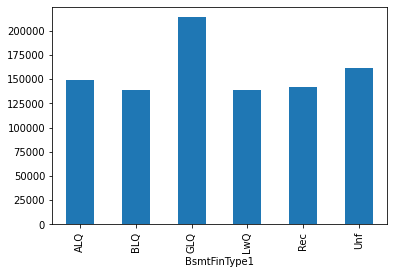

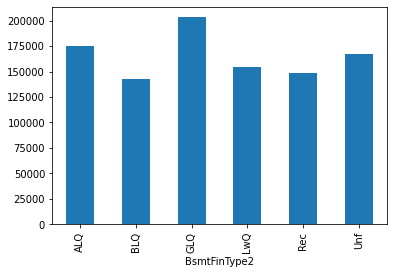

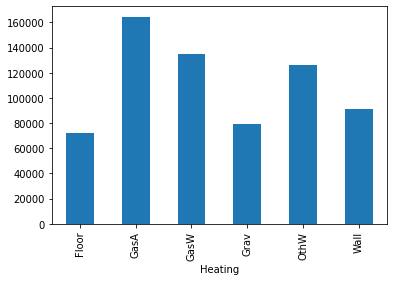

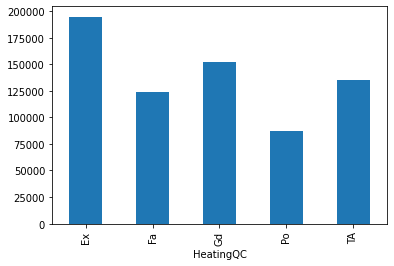

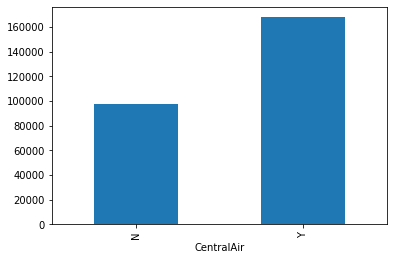

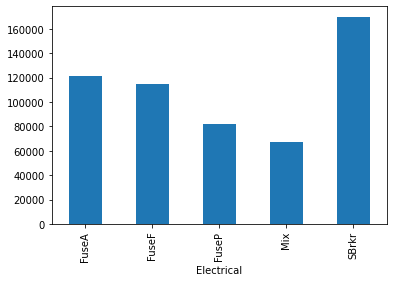

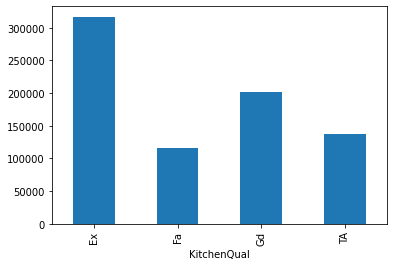

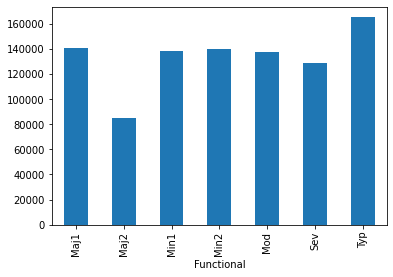

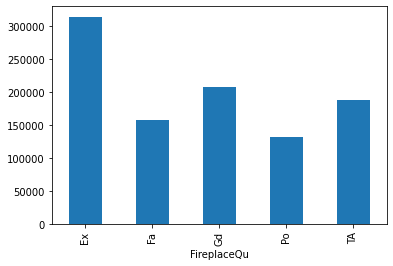

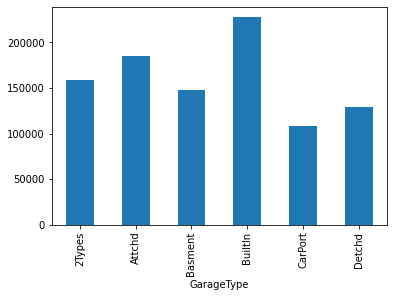

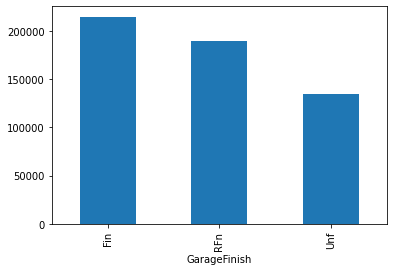

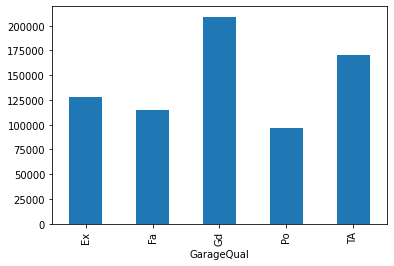

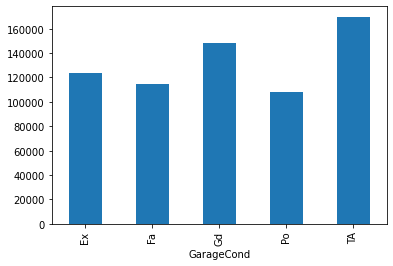

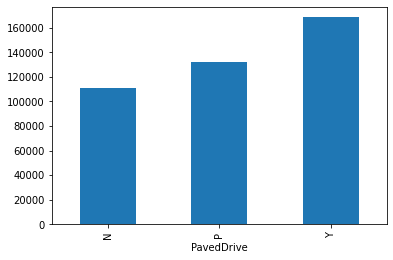

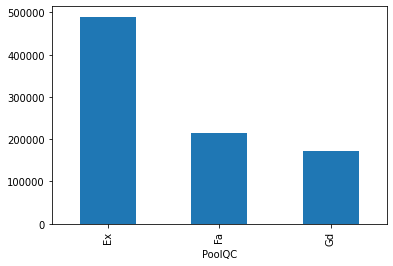

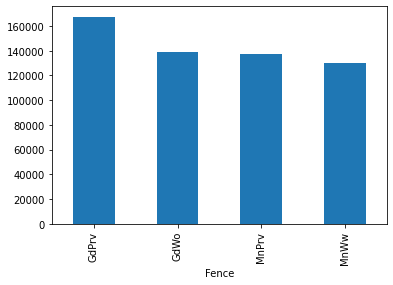

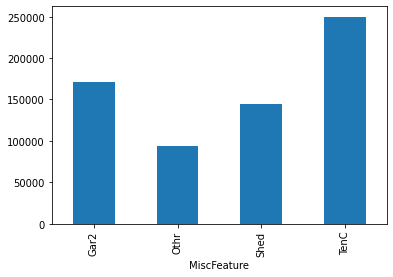

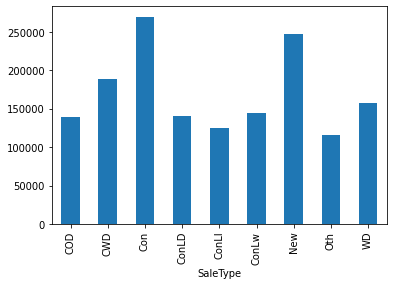

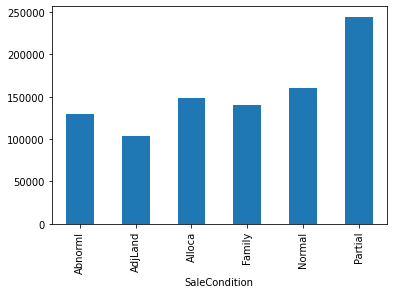

In [26]:
for feature in cat_cols:
    plt.figure()
    train.groupby(feature)['SalePrice'].median().plot(kind='bar')

## Feature Engineering


In [27]:
train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [28]:
# def resolve_categorial_null(df):
#     cols=[col for col in df.columns if (df[col].dtype=='object') and ( df[col].isnull().any())]
#     for col in cols:
#         df[col]='Missing'
#     return df


In [29]:
def resolve_categorial_null(df):
    cols=[col for col in df.columns if (df[col].dtype=='object') and ( df[col].isnull().any())]
    for col in cols:
        df[col+'_isnan']=np.where(df[col].isnull(),1,0)
        df[col]=df[col].fillna(df[col].mode()[0])
    return df


In [30]:
def resolve_numeric_null(df):
    cols=[col for col in df.columns if (df[col].dtype in ['int64','float64']) and (df[col].isnull().any())]
    for col in cols:
        
        df[col+'_isnan']=np.where(df[col].isnull(),1,0)
        df[col]=df[col].fillna(df[col].median())
    return df

In [31]:
def resolve_date_value(df):
    for yr in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
        df[yr]=df['YrSold']-df[yr]
    return df

In [32]:
continuous_num_cols.remove('SalePrice')

In [33]:
def log_transform(df):
    for feature in continuous_num_cols:
        if 0 in df[feature].unique():
#             df[feature]=np.log(df[feature]+1)
            pass
        else:
            df[feature]=np.log(df[feature])
    return df

In [34]:
df=resolve_categorial_null(train_test)
df=resolve_numeric_null(df)
df=resolve_date_value(df)
df=log_transform(df)

In [35]:
col=np.array([col for col in df.columns if col not in cat_cols])
df[col].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MasVnrArea_isnan,BsmtFinSF1_isnan,BsmtFinSF2_isnan,BsmtUnfSF_isnan,TotalBsmtSF_isnan,BsmtFullBath_isnan,BsmtHalfBath_isnan,GarageYrBlt_isnan,GarageCars_isnan,GarageArea_isnan
0,60,4.174387,9.041922,7,5,5,5,196.0,706.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20,4.382027,9.169518,6,8,31,31,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,4.219508,9.328123,7,5,7,6,162.0,486.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,70,4.094345,9.164296,7,5,91,36,0.0,216.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,4.430817,9.565214,8,5,8,8,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cat_dummies=pd.get_dummies(df[cat_cols])
df=df.drop(cat_cols,axis=1)

In [37]:
df=pd.concat([df,cat_dummies],axis=1)

In [38]:
df.shape

(2919, 322)

In [39]:
df_train=df.iloc[:1460]
df_test=df.iloc[1460:]


In [40]:
df_train.shape

(1460, 322)

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()

In [42]:
df_train[continuous_num_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,4.174387,9.041922,196.0,706.0,0.0,150.0,856.0,6.752270,854,7.444249,548.0,0,61,0,0
1,4.382027,9.169518,0.0,978.0,0.0,284.0,1262.0,7.140453,0,7.140453,460.0,298,0,0,0
2,4.219508,9.328123,162.0,486.0,0.0,434.0,920.0,6.824374,866,7.487734,608.0,0,42,0,0
3,4.094345,9.164296,0.0,216.0,0.0,540.0,756.0,6.867974,756,7.448334,642.0,0,35,272,0
4,4.430817,9.565214,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,7.695303,836.0,192,84,0,0


In [43]:
df_train.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSZoning_isnan           0
A

In [44]:
df_train[continuous_num_cols]=pd.DataFrame(scaler.fit_transform(df_train[continuous_num_cols]),columns=df_train[continuous_num_cols].columns)
df_test[continuous_num_cols]=pd.DataFrame(scaler.fit_transform(df_test[continuous_num_cols]),columns=df_test[continuous_num_cols].columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
df_train.drop([691,1182,523,1298],inplace=True)
y.drop([691,1182,523,1298],inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(df_train,y,test_size=0.2)

In [47]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
pred=xg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,pred))

MAE: 16241.228408604453


In [49]:
from sklearn.linear_model import Lasso,LassoCV
from sklearn.feature_selection import SelectFromModel

In [50]:
feature_model=SelectFromModel(Lasso(alpha=0.005,random_state=0)).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190520320279.50662, tolerance: 672096544.2771181
  positive)


In [51]:
features=feature_model.get_support()
features=X_train.columns[features]


In [52]:
xg.fit(X_train[features],y_train)
pred=xg.predict(X_test[features])
print('MAE:',mean_absolute_error(y_test,pred))

MAE: 16276.285102739726


In [53]:
xg=xgb.XGBRegressor()
xg.fit(X_train[features],np.log(y_train))
pred=xg.predict(X_test[features])
print('MAE:',mean_absolute_error(y_test,np.exp(pred)))

MAE: 16963.656129601884


In [69]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=xgb.XGBRegressor(),scoring='neg_mean_absolute_error',cv=5,param_grid={'n_estimators':[400,500,600],'learning_rate':[0.01,0.03,0.05,0.07],'max_depth':[1,3,4,5]},verbose=1,n_jobs=-1)

In [ ]:
gcv.fit(X_train[features],y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.1s


In [68]:
gcv.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
xg=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.061, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xg.fit(X_train[features],np.log(y_train))
pred=xg.predict(X_test[features])
print('MAE:',mean_absolute_error(y_test,np.exp(pred)))

MAE: 14478.099114404966


In [58]:
import lightgbm as lgb
# Dtrain=lgb.Dataset(X_train,label=y_train)
reg=lgb.LGBMRegressor(objective='Regression',n_estimators=2500,learning_rate=0.01,num_leaves=4)
reg.fit(X_train[features],np.log(y_train))
pred=reg.predict(X_test[features])
print('MAE:',mean_absolute_error(y_test,np.exp(pred)))

MAE: 14015.208378226243


In [59]:
# from sklearn.model_selection import GridSearchCV
# gcv=GridSearchCV(estimator=lgb.LGBMRegressor(),scoring='neg_mean_absolute_error',cv=5,param_grid={'n_estimators':[2700,2900,3100,3500],'learning_rate':[0.01,0.02,0.03,0.05],'max_depth':[5,6,7,8],'num_leaves':[5,7,9,11]},verbose=1,n_jobs=-1)
# gcv.fit(df_train[features],y)

In [60]:
# gcv.best_estimator_

In [61]:
reg=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=2000, n_jobs=-1, num_leaves=3, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
reg.fit(X_train[features],np.log(y_train))
pred=reg.predict(X_test[features])
print('MAE:',mean_absolute_error(y_test,np.exp(pred)))

MAE: 13905.252586347826


In [62]:
final_modelxgb=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.061, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
final_modelxgb.fit(df_train[features],np.log(y))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.061, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
final_modellgb=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=6,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3100, n_jobs=-1, num_leaves=7, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
final_modellgb.fit(df_train[features],np.log(y))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=6,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3100, n_jobs=-1, num_leaves=7, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
pred=np.exp(final_modellgb.predict(df_test[features]))
pred=pd.DataFrame(pred,columns=['SalePrice'])
result=pd.concat([Id,pred],axis=1)
result.to_csv('submission.csv',index=False)
result

,Id,SalePrice
0,1461,119946.492824
1,1462,153983.569062
2,1463,182131.912728
3,1464,191132.072297
4,1465,186022.818705
5,1466,175116.768822
6,1467,177295.023853
7,1468,171958.292758
8,1469,186376.322679
9,1470,124017.994177
